In [4]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [10]:
#read csv files
df = pd.read_csv('data/processed/final_data.csv')
df.head()

,Unnamed: 0,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,0,80.0,1.020,1.0,0.0,1,36.0,1.2,80.0,80.0,15.4,7800.0,5.2,1,0
1,1,50.0,1.020,4.0,0.0,1,18.0,0.8,80.0,80.0,11.3,6000.0,80.0,0,0
2,2,80.0,1.010,2.0,3.0,1,53.0,1.8,80.0,80.0,9.6,7500.0,80.0,0,0
3,3,70.0,1.005,4.0,0.0,1,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1,0
4,4,80.0,1.010,2.0,0.0,1,26.0,1.4,80.0,80.0,11.6,7300.0,4.6,0,0


In [11]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [12]:
y.value_counts()

Class
0    250
1    150
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

ModuleNotFoundError: No module named 'sklearn'

In [45]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf.fit(X_train,Y_train)

y_predi=clf.predict(X_test)

In [46]:
AccR=accuracy_score(Y_test, y_predi)

In [47]:
print(AccR)

1.0


In [49]:
from sklearn.model_selection import cross_val_score
knn_sc=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=15)
    knn_sc.append(score.mean())

Text(0.5, 1.0, 'k neighbour scores')

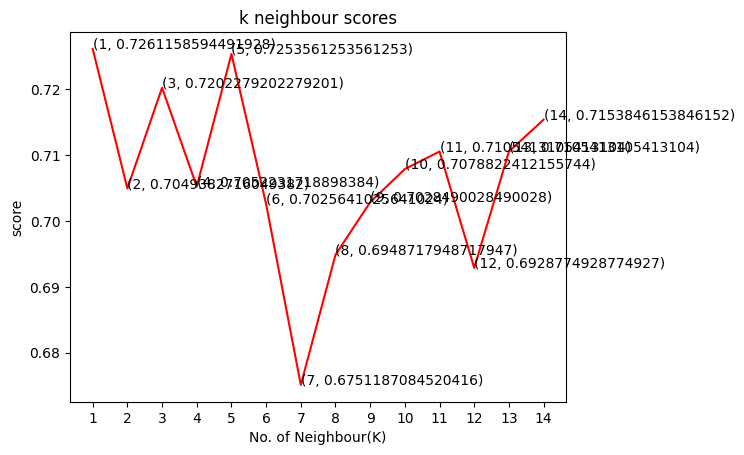

In [50]:
plt.plot([k for k in range(1,15)],knn_sc,color='red')
for i in range(1,15):
    plt.text(i,knn_sc[i-1],(i,knn_sc[i-1]))
plt.xticks([i for i in range(1,15)])
plt.xlabel("No. of Neighbour(K)")
plt.ylabel("score")
plt.title('k neighbour scores')

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, Y_train)

    #Predict the response for test dataset
y_pred = knn.predict(X_test)

In [52]:
AccK=accuracy_score(Y_test, y_pred)

In [53]:
print(AccK)

0.75


In [54]:
model = DecisionTreeClassifier()

# fit the model with the training data
model.fit(X_train,Y_train)
# depth of the decision tree
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 5


In [55]:
y_predi=model.predict(X_test)

In [56]:
AccD=accuracy_score(Y_test, y_predi)

In [57]:
print(AccD)

0.9583333333333334


In [58]:
Nb = GaussianNB()

#Train the model using the training sets
Nb.fit(X_train,Y_train)

#prediction
prediction=Nb.predict(X_test)

In [59]:
AccNB=accuracy_score(Y_test, prediction)

In [60]:
print(AccNB)

0.9166666666666666


In [61]:
newdf = pd.DataFrame({'RandomForest': AccR*100.0, 'DecisionTree':AccD*100.0,'Knn': AccK*100.0, 'NaiveBayes':AccNB*100.0},index=[0])

In [62]:
newdf

,RandomForest,DecisionTree,Knn,NaiveBayes
0,100.0,95.833333,75.0,91.666667


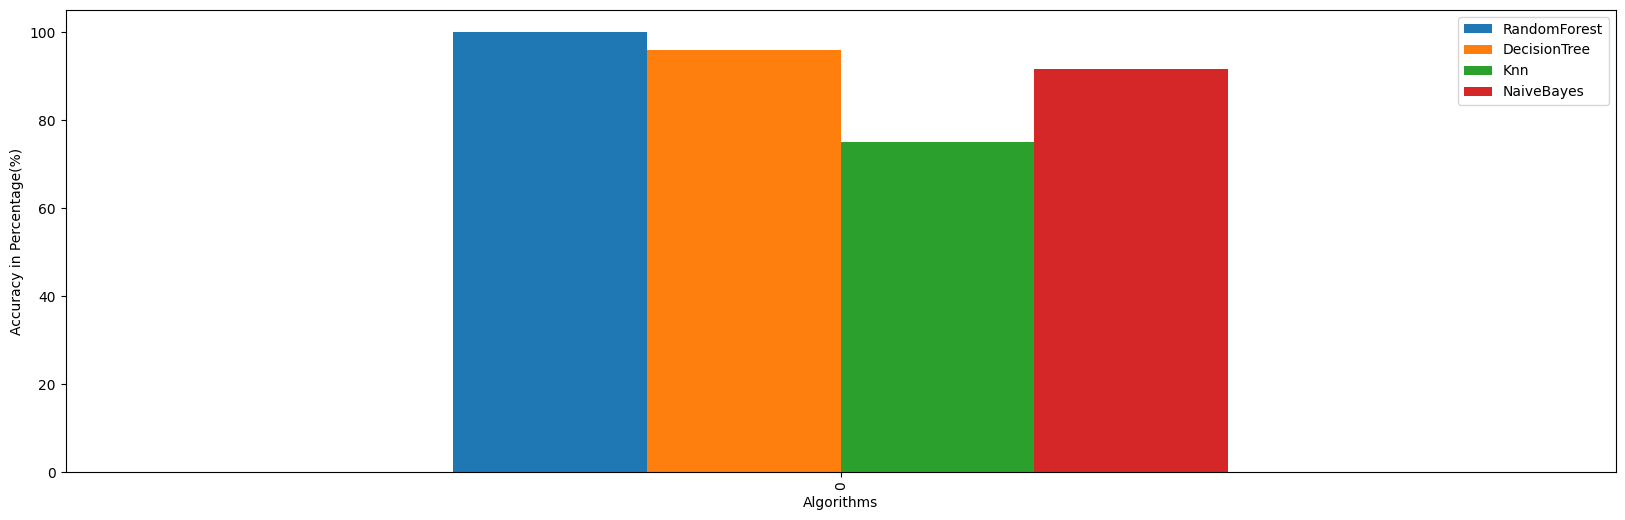

In [63]:
df1 = newdf
df1.plot(kind='bar',figsize=(20,6))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy in Percentage(%)')
plt.show()

<Axes: >

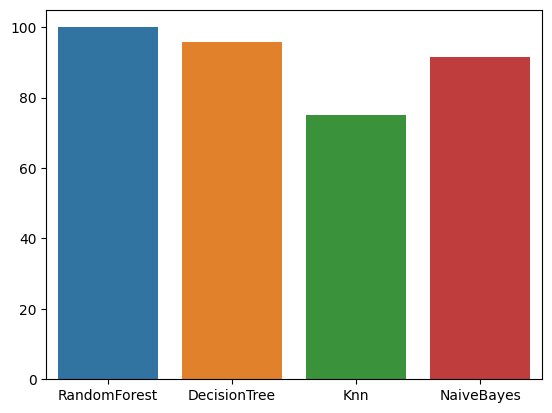

In [64]:
sns.barplot(data=df1)